<a href="https://colab.research.google.com/github/RELLABHAVANISOWMYA/DataScience-Hackathon/blob/main/Copy_of_datascience_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/13_spotify-2023.csv', encoding='ISO-8859-1')

In [ ]:
print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['released_year'] = data['released_year'].astype(int)

In [ ]:
features = ['danceability_%', 'energy_%', 'acousticness_%', 'bpm']

In [ ]:
data_features = data[features]

In [ ]:
print(data_features)

     danceability_%  energy_%  acousticness_%  bpm
0                80        83              31  125
1                71        74               7   92
2                51        53              17  138
3                55        72              11  170
4                65        80              14  144
..              ...       ...             ...  ...
948              60        39              57  144
949              42        24              83  166
950              80        67               4   92
951              82        77               8   97
952              61        67              15   90

[953 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data_features_scaled = scaler.fit_transform(data_features)

In [ ]:
print(data_features_scaled)

[[ 0.8910956   1.13172906  0.15172895  0.08770797]
 [ 0.27562395  0.58765417 -0.77197202 -1.08905306]
 [-1.09209084 -0.68185391 -0.38709661  0.55128049]
 ...
 [ 0.8910956   0.16448481 -0.88743464 -1.08905306]
 [ 1.02786708  0.76901247 -0.73348448 -0.91075594]
 [-0.40823344  0.16448481 -0.46407169 -1.16037191]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim = cosine_similarity(data_features_scaled)

In [ ]:
print(cosine_sim.shape)

(953, 953)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data = pd.read_csv('/13_spotify-2023.csv', encoding='ISO-8859-1')

# Preprocess data
data.fillna(0, inplace=True)
data.drop_duplicates(inplace=True)
data['released_year'] = data['released_year'].astype(int)

# Select relevant features
features = ['danceability_%', 'energy_%', 'acousticness_%', 'bpm']
data_features = data[features]

# Scale the features
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

# Calculate cosine similarity
cosine_sim = cosine_similarity(data_features_scaled)

# Recommendation function with error handling
def recommend_songs(track_name, data, cosine_sim, num_recommendations=5):
    # Ensure that the track_name exists in the dataset
    if track_name not in data['track_name'].values:
        print(f"Error: '{track_name}' not found in the dataset.")
        return None

    # Create a Series to map track names to their indices
    indices = pd.Series(data.index, index=data['track_name']).drop_duplicates()

    # Get the index of the given track
    idx = indices[track_name]

    # Get similarity scores for all songs with the given track
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar songs (excluding the first one, which is the song itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top n most similar songs
    return data[['track_name', 'artist(s)_name']].iloc[song_indices]

# Test recommendation
track_name = 'LALA'  # Replace this with a track that exists in your dataset
recommended_songs = recommend_songs(track_name, data, cosine_sim, num_recommendations=5)

if recommended_songs is not None:
    print(recommended_songs)


             track_name               artist(s)_name
348  Red Ruby Da Sleeze                  Nicki Minaj
827             Run BTS                          BTS
375         Besos Moja2     Wisin & Yandel, ROSALï¿½
345    SPIT IN MY FACE!                     ThxSoMch
398            Muï¿½ï¿½  Steve Aoki, Tini, La Joaqui


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data = pd.read_csv('/13_spotify-2023.csv', encoding='ISO-8859-1')

# Preprocess data
data.fillna(0, inplace=True)
data.drop_duplicates(inplace=True)
data['released_year'] = data['released_year'].astype(int)

# Select relevant features for cosine similarity
features = ['danceability_%', 'energy_%', 'acousticness_%', 'bpm']
data_features = data[features]

# Scale the features
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

# Calculate cosine similarity
cosine_sim = cosine_similarity(data_features_scaled)

# Recommendation function based on track name
def recommend_songs_by_track(track_name, data, cosine_sim, num_recommendations=5):
    # Ensure that the track exists in the dataset
    if track_name not in data['track_name'].values:
        print(f"Error: '{track_name}' not found in the dataset.")
        return None

    # Create a Series to map track names to their indices
    indices = pd.Series(data.index, index=data['track_name']).drop_duplicates()

    # Get the index of the given track
    idx = indices[track_name]

    # Get similarity scores for all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar songs (excluding the first one, which is the song itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top n most similar songs
    return data[['track_name', 'artist(s)_name']].iloc[song_indices]

# Recommendation function based on artist name
def recommend_songs_by_artist(track_name, artist_name, data, cosine_sim, num_recommendations=5):
    # Ensure that the track and artist exist in the dataset
    track_exists = data[(data['track_name'] == track_name) & (data['artist(s)_name'] == artist_name)]

    if track_exists.empty:
        print(f"Error: '{track_name}' by '{artist_name}' not found in the dataset.")
        return None

    # Create a Series to map track names and artists to their indices
    indices = pd.Series(data.index, index=[(data['track_name'], data['artist(s)_name'])]).drop_duplicates()

    # Get the index of the given track and artist
    idx = indices[(track_name, artist_name)]

    # Get similarity scores for all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar songs (excluding the first one, which is the song itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Extract recommended songs and artists
    recommended = data[['track_name', 'artist(s)_name']].iloc[song_indices]

    # Optional: prioritize recommendations from the same artist
    same_artist_recommendations = recommended[recommended['artist(s)_name'] == artist_name]

    if not same_artist_recommendations.empty:
        print(f"Recommended songs from '{artist_name}':")
        print(same_artist_recommendations)
    else:
        print(f"No similar songs found from '{artist_name}'.")

    # Return the top n most similar songs from other artists as well
    return recommended

# Ask the user for their preference
print("Would you like to get song recommendations based on:")
print("1. Track Name")
print("2. Artist Name")

choice = input("Enter 1 or 2: ")

if choice == '1':
    # Get track name input from the user
    track_name = input("Enter the track name: ")
    recommended_songs = recommend_songs_by_track(track_name, data, cosine_sim, num_recommendations=5)

    if recommended_songs is not None:
        print("\nRecommended songs based on track name:")
        print(recommended_songs)

elif choice == '2':
    # Get track name and artist name input from the user
    track_name = input("Enter the track name: ")
    artist_name = input("Enter the artist name: ")

    recommended_songs = recommend_songs_by_artist(track_name, artist_name, data, cosine_sim, num_recommendations=5)

    if recommended_songs is not None:
        print("\nRecommended songs based on artist name:")
        print(recommended_songs)

else:
    print("Invalid choice! Please enter 1 or 2.")


Would you like to get song recommendations based on:
1. Track Name
2. Artist Name


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
data = pd.read_csv('/13_spotify-2023.csv', encoding='ISO-8859-1')

In [ ]:
# Preprocess data
data.fillna(0, inplace=True)
data.drop_duplicates(inplace=True)
data['released_year'] = data['released_year'].astype(int)

In [ ]:
# 1. Find the song with the highest total streams on Spotify.
def highest_total_streams(data):
    max_streams_row = data.loc[data['streams'].idxmax()]  # Use 'streams' instead of 'streams_spotify'
    return max_streams_row[['track_name', 'artist(s)_name', 'streams']]

# Get and print the song with the highest streams
print("Song with highest total streams on Spotify:")
print(highest_total_streams(data))

Song with highest total streams on Spotify:
track_name                      Love Grows (Where My Rosemary Goes)
artist(s)_name                                    Edison Lighthouse
streams           BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: 574, dtype: object


In [ ]:
import pandas as pd

def highest_rank_across_platforms(data):
    # Convert rank columns to numeric, forcing errors to NaN
    rank_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
    data[rank_columns] = data[rank_columns].apply(pd.to_numeric, errors='coerce')

    # Optionally fill NaN values with a high number (e.g., max possible rank + 1)
    data[rank_columns] = data[rank_columns].fillna(1000)

    # Calculate the average rank (lower is better)
    data['average_rank'] = data[rank_columns].mean(axis=1)

    # Find the song with the minimum average rank
    max_rank_row = data.loc[data['average_rank'].idxmin()]  # Lower rank is better
    return max_rank_row[['track_name', 'artist(s)_name', 'average_rank']]

# Assuming you have already loaded your data
# data = pd.read_csv('your_data_file.csv')

# Example usage
print("Song ranked highest across platforms:")
print(highest_rank_across_platforms(data))


Song ranked highest across platforms:
track_name        Peaches (from The Super Mario Bros. Movie)
artist(s)_name                                    Jack Black
average_rank                                             0.0
Name: 327, dtype: object


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# 3. Linear regression to predict energy based on bpm and other features
def predict_energy_from_bpm(data, bpm_value=None):
    # Include more features to improve prediction
    X = data[['bpm', 'danceability_%', 'valence_%']]  # Add more independent variables
    y = data['energy_%']  # Dependent variable: Energy level

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # If user provides a bpm_value, use it to predict energy
    if bpm_value is not None:
        # Provide other features manually as well (danceability and valence)
        bpm_value = np.array([[bpm_value, 70, 50]])  # Manually set these values
        predicted_energy = model.predict(bpm_value)
        print(f"Predicted energy for BPM {bpm_value[0][0]}: {predicted_energy[0]}")
    else:
        # Test the model on the test set
        y_pred = model.predict(X_test)
        print("Model tested on test set")

# Call the function
predict_energy_from_bpm(data, bpm_value=120);


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# 4. Linear regression to predict valence based on energy and danceability
def predict_valence_from_energy_and_danceability(data, energy=None, danceability=None):
    X = data[['energy_%', 'danceability_%']]  # Independent variables: Energy and Danceability
    y = data['valence_%']  # Dependent variable: Valence

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print the coefficients and intercept
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    # If user provides energy and danceability, use them to predict valence
    if energy is not None and danceability is not None:
        input_features = np.array([[energy, danceability]])  # Create a 2D array for input
        predicted_valence = model.predict(input_features)

        # Determine mood based on valence
        mood = "happy" if predicted_valence[0] > 0.5 else "sad"  # Assuming 0.5 is the threshold for happiness
        print(f"Predicted valence: {predicted_valence[0]}, Mood: {mood}")
    else:
        # Test the model on the test set
        y_pred = model.predict(X_test)
        print("Model tested on test set")

# Call the function with manual inputs for energy and danceability
predict_valence_from_energy_and_danceability(data, energy=-20, danceability=-10)


Coefficients: [0.42620711 0.53878376]
Intercept: -11.469776357109758
Predicted valence: -25.381756116815232, Mood: sad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

def artist_impact_on_success(data):
    # Ensure the streams column is numeric
    data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

    # Drop rows where streams are NaN (if necessary)
    data = data.dropna(subset=['streams'])

    # Group by artist and calculate average streams
    artist_group = data.groupby('artist(s)_name')['streams'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

    return artist_group

# Assuming 'data' is your DataFrame
artist_impact = artist_impact_on_success(data)

print("Artist impact on success:")
print(artist_impact)


Artist impact on success:
                                                    count          mean
artist(s)_name                                                         
Tones and I                                             1  2.864792e+09
Post Malone, Swae Lee                                   1  2.808097e+09
Drake, WizKid, Kyla                                     1  2.713922e+09
Justin Bieber, The Kid Laroi                            1  2.665344e+09
The Chainsmokers, Halsey                                1  2.591224e+09
...                                                   ...           ...
Offset, JID                                             1  2.497565e+07
Mc Pedrinho, DJ 900                                     1  1.195664e+07
Sog, Ryan Castro, Peso Pluma                            1  1.159939e+07
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vi...      1  1.365184e+06
Carin Leon, Grupo Frontera                              1  2.762000e+03

[644 rows x 2 columns]


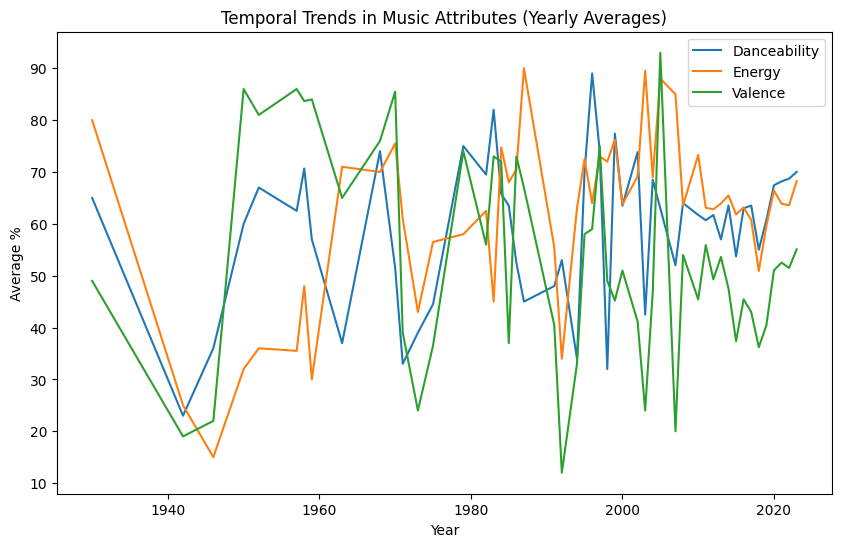

In [ ]:
import matplotlib.pyplot as plt

# 6. Temporal trends: Shifts in music attributes over time
def temporal_trends(data):
    yearly_data = data.groupby('released_year')[['danceability_%', 'energy_%', 'valence_%']].mean()

    # Plot trends over time
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data.index, yearly_data['danceability_%'], label='Danceability')
    plt.plot(yearly_data.index, yearly_data['energy_%'], label='Energy')
    plt.plot(yearly_data.index, yearly_data['valence_%'], label='Valence')

    plt.title('Temporal Trends in Music Attributes (Yearly Averages)')
    plt.xlabel('Year')
    plt.ylabel('Average %')
    plt.legend()
    plt.show()

temporal_trends(data)


In [ ]:
# 7. Cross-platform presence: Investigate how songs perform across streaming services
def cross_platform_performance(data):
    # Correlation between rankings on different platforms
    correlation = data[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].corr()
    return correlation

print("Cross-platform performance correlation:")
print(cross_platform_performance(data))


Cross-platform performance correlation:
                   in_spotify_charts  in_apple_charts  in_deezer_charts  \
in_spotify_charts           1.000000         0.552232          0.600205   
in_apple_charts             0.552232         1.000000          0.383668   
in_deezer_charts            0.600205         0.383668          1.000000   
in_shazam_charts            0.577374         0.409845          0.396357   

                   in_shazam_charts  
in_spotify_charts          0.577374  
in_apple_charts            0.409845  
in_deezer_charts           0.396357  
in_shazam_charts           1.000000  


In [ ]:
# 8. Top 10 artists with most hits in 2023
def top_artists_2023(data):
    data_2023 = data[data['released_year'] == 2023]  # Filter for 2023
    top_artists = data_2023['artist(s)_name'].value_counts().head(10)  # Count number of songs per artist
    return top_artists

print("Top 10 artists with the most hits in 2023:")
print(top_artists_2023(data))


Top 10 artists with the most hits in 2023:
artist(s)_name
Morgan Wallen                      8
Taylor Swift                       6
Jimin                              3
Karol G                            3
NewJeans                           3
Mambo Kingz, DJ Luian, Anuel Aa    2
Jasiel Nuï¿½ï¿½ez, Peso P          2
Fuerza Regida                      2
Fifty Fifty                        2
Junior H, Peso Pluma               2
Name: count, dtype: int64


In [ ]:
# 9. Identify highly correlated features
def feature_correlations(data):
    features = ['danceability_%', 'energy_%', 'acousticness_%', 'valence_%', 'bpm']
    correlation_matrix = data[features].corr()
    return correlation_matrix

print("Feature correlations:")
print(feature_correlations(data))


Feature correlations:
                danceability_%  energy_%  acousticness_%  valence_%       bpm
danceability_%        1.000000  0.198095       -0.236165   0.408451 -0.147095
energy_%              0.198095  1.000000       -0.577344   0.357612  0.025794
acousticness_%       -0.236165 -0.577344        1.000000  -0.081907 -0.017694
valence_%             0.408451  0.357612       -0.081907   1.000000  0.041195
bpm                  -0.147095  0.025794       -0.017694   0.041195  1.000000


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
def attributes_performance_analysis(data):
    # Analyze performance based on danceability, energy, and valence
    performance_analysis = data[['danceability_%', 'energy_%', 'valence_%', 'streams']].groupby(
        ['danceability_%', 'energy_%', 'valence_%']).mean().reset_index()

    return performance_analysis

print("Attributes performance analysis:")
print(attributes_performance_analysis(data))


Attributes performance analysis:
     danceability_%  energy_%  valence_%       streams
0                23        25         19  3.955914e+08
1                24        60         76  6.638321e+08
2                25        30         17  2.973290e+08
3                27        49         10  5.393353e+07
4                28        20         26  1.219132e+08
..              ...       ...        ...           ...
945              95        57         83  1.761039e+08
946              95        66         78  1.424590e+09
947              95        69         43  2.943521e+08
948              95        89         91  4.286857e+08
949              96        42         71  2.612865e+08

[950 rows x 4 columns]
